# **Authors**

**Team 03**

**Team Members:**

**Different Models**


*   Radhika Malviya
*   Silky Shah
*   Vinay Vihari Lakamsani
*   Janani Vasudevan
*   Xiaoxu Xing


# **Amazon customer review **

In [0]:
# basic data manipulation and import
import pandas as pd
#plotting the graph
import matplotlib.pyplot as plt
# Matrix multiplication
import matplotlib as mpl
# natural Language Processing utilities
import nltk.classify.util
# Splitting data for test and train sets
from sklearn.model_selection import train_test_split
# for making the confusion matrix
from sklearn.metrics import confusion_matrix
# for calcualting matrics
from sklearn import metrics
# For making ROC_Curve and AUC
from sklearn.metrics import roc_curve, auc
# Importing naiveBayesClassifier
from nltk.classify import NaiveBayesClassifier
# Importing numpy for mathematical function
import numpy as np
# finding the matching String with the \
import re
import string
import nltk
%matplotlib inline

# **Importing the Data**

Imported data from google drive and made as dowloadable link

In [3]:
# importing the URL
url = "https://drive.google.com/uc?export=download&id=1k8rHxOQ7StKMuVKadsEEqy-YkzH0eyA5"
df =  pd.read_csv(url)
df.head(1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter


# **Data Pre-Processing**

## Dropping unwanted variables 

In [4]:
# useful variables which are going to be used in further process
permanent = df[['reviews.rating','reviews.text','reviews.title']]
permanent.head()

,reviews.rating,reviews.text,reviews.title
0,5.0,This product so far has not disappointed. My c...,Kindle
1,5.0,great for beginner or experienced person. Boug...,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


## **Filtering not null values**

In [5]:
# check is our y Variable
check = permanent[permanent["reviews.rating"].notnull()]
check.head()

,reviews.rating,reviews.text,reviews.title
0,5.0,This product so far has not disappointed. My c...,Kindle
1,5.0,great for beginner or experienced person. Boug...,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


## **Classifying text as postive and negative**




*   Making the reviews greater than 4 as positive and rest as negative Reviews
*   saving this to senti dataframe



In [6]:
senti= permanent[permanent["reviews.rating"].notnull()]
# makes the Reviews > 4 as the TRUE and rest as the FALSE
senti["senti"] = senti["reviews.rating"]>=4
#senti["senti"] = senti.loc[,'reviews.rating' >=4]
# Makes the review from TRUE FaLSE to POS and NEG
senti["senti"] = senti["senti"].replace([True,False],["pos","neg"])
senti.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,reviews.rating,reviews.text,reviews.title,senti
0,5.0,This product so far has not disappointed. My c...,Kindle,pos
1,5.0,great for beginner or experienced person. Boug...,very fast,pos
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,pos
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,pos
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,pos


In [7]:
print(senti.head())

   reviews.rating                                       reviews.text  \
0             5.0  This product so far has not disappointed. My c...   
1             5.0  great for beginner or experienced person. Boug...   
2             5.0  Inexpensive tablet for him to use and learn on...   
3             4.0  I've had my Fire HD 8 two weeks now and I love...   
4             5.0  I bought this for my grand daughter when she c...   

                             reviews.title senti  
0                                   Kindle   pos  
1                                very fast   pos  
2  Beginner tablet for our 9 year old son.   pos  
3                                  Good!!!   pos  
4                Fantastic Tablet for kids   pos  


## **Count of reviews**

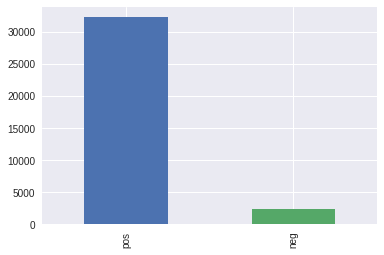

In [8]:
#counting each set of pos and neg : then plotting the graph
senti["senti"].value_counts().plot.bar()

As we can see data is unbalanced so this will create problem for model but, will take this data as it is and will predict our reviews.

## **Cleaning the Review text**

*  we will clean the reviews text and save it as the  summary clean text in new column which makes easy to model
*  cleaning has three steps 1. converting to string 2. to lower case 3. removing other than A to z character like symbols

In [9]:
# saving below pattern match
cleanup_re =re.compile('[^a-z]+')

#cleaning each sentence of reviews
def cleanup(sentence) :
  sentence = str(sentence)
  sentence = sentence.lower()
  sentence = cleanup_re.sub(' ',sentence).strip()
  return sentence

senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup)
check["Summary_Clean"] = check["reviews.text"].apply(cleanup)
senti.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,reviews.rating,reviews.text,reviews.title,senti,Summary_Clean
0,5.0,This product so far has not disappointed. My c...,Kindle,pos,this product so far has not disappointed my ch...
1,5.0,great for beginner or experienced person. Boug...,very fast,pos,great for beginner or experienced person bough...
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,pos,inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,pos,i ve had my fire hd two weeks now and i love i...
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,pos,i bought this for my grand daughter when she c...


# **Splitting Train and Test Data**

*  Considering only the cleaned text and respective sentiment
*  75% as the training and 25% as the test dataset

In [10]:
split =senti[["Summary_Clean","senti"]]
#Making train and test sets
train = split.sample(frac=0.75,random_state=3)
# dropping trainsets
test=split.drop(train.index)
train.head()

,Summary_Clean,senti
23523,alexa is awesome she controls the lights in th...,pos
26957,does everything it says it does great speaker ...,pos
31693,this product is a lifesaver the quality is exc...,pos
11167,i bought of these tablets on black friday for ...,pos
8732,everything was great the actual item is holdin...,pos


# **NLTK Navie Baies Classifier**

## **Feature Extractor **

Converting the sentence into list of words

In [11]:

#Stemming to each sentence
from nltk.stem import PorterStemmer
ps = PorterStemmer()

import nltk
nltk.download('wordnet')

# lemmatization to each dsentence
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

def word_feats(words):
  features = {}
  for word in words:
    #word=ps.stem(word)
    #print("after steeming:" + word)
    word= lmtzr.lemmatize(word)
    #print("after lemtixingn:" +word)
    features [word] = True
  return features




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
ef =str("i am the good nice large larger run running")
efa = ef.split()
word_feats(efa)

{'am': True,
 'good': True,
 'i': True,
 'large': True,
 'larger': True,
 'nice': True,
 'run': True,
 'running': True,
 'the': True}

In [13]:
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()
check["words"] = check["Summary_Clean"].str.lower().str.split()
#train.head()
check.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,reviews.rating,reviews.text,reviews.title,Summary_Clean,words
0,5.0,This product so far has not disappointed. My c...,Kindle,this product so far has not disappointed my ch...,"[this, product, so, far, has, not, disappointe..."
1,5.0,great for beginner or experienced person. Boug...,very fast,great for beginner or experienced person bough...,"[great, for, beginner, or, experienced, person..."
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,inexpensive tablet for him to use and learn on...,"[inexpensive, tablet, for, him, to, use, and, ..."
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,i ve had my fire hd two weeks now and i love i...,"[i, ve, had, my, fire, hd, two, weeks, now, an..."
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,i bought this for my grand daughter when she c...,"[i, bought, this, for, my, grand, daughter, wh..."


Indexing all the datasets

In [14]:
# setting the index to the all seets
train.index = range(train.shape[0])
test.index  = range(test.shape[0])
check.index = range(check.shape[0])

train.head()

,Summary_Clean,senti,words
0,alexa is awesome she controls the lights in th...,pos,"[alexa, is, awesome, she, controls, the, light..."
1,does everything it says it does great speaker ...,pos,"[does, everything, it, says, it, does, great, ..."
2,this product is a lifesaver the quality is exc...,pos,"[this, product, is, a, lifesaver, the, quality..."
3,i bought of these tablets on black friday for ...,pos,"[i, bought, of, these, tablets, on, black, fri..."
4,everything was great the actual item is holdin...,pos,"[everything, was, great, the, actual, item, is..."


In [15]:
train.shape[0]

25970

Assining the Pos and Neg values form senti to each word on the review text

## **Text to Words**

In [16]:
train["words"][0]

['alexa',
 'is',
 'awesome',
 'she',
 'controls',
 'the',
 'lights',
 'in',
 'the',
 'house',
 'keeps',
 'me',
 'up',
 'to',
 'date',
 'and',
 'dressed',
 'for',
 'the',
 'weather',
 'i',
 'enjoying',
 'discovering',
 'what',
 'else',
 'i',
 'can',
 'do',
 'with',
 'her',
 'ask',
 'her',
 'who',
 'is',
 'the',
 'fairest',
 'of',
 'them',
 'all']

In [0]:
prediction = {}
train_naive = []
test_naive = []
check_naive = []

#splitig each sentence and adding with True to the string
for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["senti"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["senti"][i]]]
for i in range(check.shape[0]):
    check_naive = check_naive +[word_feats(check["words"][i])]


In [18]:
train_naive[0]

[{'alexa': True,
  'all': True,
  'and': True,
  'ask': True,
  'awesome': True,
  'can': True,
  'control': True,
  'date': True,
  'discovering': True,
  'do': True,
  'dressed': True,
  'else': True,
  'enjoying': True,
  'fairest': True,
  'for': True,
  'her': True,
  'house': True,
  'i': True,
  'in': True,
  'is': True,
  'keep': True,
  'light': True,
  'me': True,
  'of': True,
  'she': True,
  'the': True,
  'them': True,
  'to': True,
  'up': True,
  'weather': True,
  'what': True,
  'who': True,
  'with': True},
 'pos']

## **Model Fitting**

In [19]:
# classifying based on the Naive bayes Classifier
classifier = NaiveBayesClassifier.train(train_naive)
acc =nltk.classify.util.accuracy(classifier , test_naive)
print("NLTK Naive bayes Accuracy : " +str(acc))
classifier.show_most_informative_features(5)

NLTK Naive bayes Accuracy : 0.6151091602171653
Most Informative Features
                  refund = True              neg : pos    =     70.3 : 1.0
               returning = True              neg : pos    =     48.9 : 1.0
                  faulty = True              neg : pos    =     42.2 : 1.0
                    logo = True              neg : pos    =     42.2 : 1.0
                 warning = True              neg : pos    =     42.2 : 1.0


**Predicting result of nltk classifier**

In [20]:
#classifying for training set
y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i] )]
prediction["Naive"]= np.asarray(y)

prediction["Naive"]

array(['pos', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype='<U3')

In [21]:
#classifying for the test set
y1 = []
for i in range(check.shape[0]):
    y1 = y1 + [classifier.classify(check_naive[i] )]

check["Naive"] = y1
check["Naive"] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0        neg
1        pos
2        pos
3        neg
4        neg
5        neg
6        pos
7        pos
8        neg
9        pos
10       neg
11       pos
12       pos
13       neg
14       pos
15       pos
16       pos
17       neg
18       pos
19       neg
20       pos
21       pos
22       pos
23       neg
24       neg
25       neg
26       pos
27       neg
28       pos
29       pos
        ... 
34597    neg
34598    neg
34599    neg
34600    neg
34601    neg
34602    neg
34603    neg
34604    neg
34605    neg
34606    neg
34607    neg
34608    neg
34609    neg
34610    neg
34611    neg
34612    neg
34613    neg
34614    neg
34615    neg
34616    pos
34617    neg
34618    pos
34619    neg
34620    neg
34621    neg
34622    neg
34623    neg
34624    neg
34625    neg
34626    neg
Name: Naive, Length: 34627, dtype: object

# **Bulding Countvector and TFIDF vector **

In [22]:
# import stopwords from word cloud
from wordcloud import STOPWORDS

# importing Term Frequency Extraction form sklearn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# stopwords removing Not from it
stopwords = set(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))

tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["Summary_Clean"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

checkcounts = count_vect.transform(check["Summary_Clean"])
checktfidf = tfidf_transformer.transform(checkcounts)



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# **Fitting Multinomial NB**

In [23]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf , train["senti"])
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1]
acc = model1.score(X_test_tfidf , test["senti"])
print("Multinomial Accuracy : "+str(acc))

check["multi"] = model1.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Multinomial Accuracy : 0.9321936005544645


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


# **Fitting Bernouli NB**

In [24]:
from sklearn.naive_bayes import BernoulliNB
#fitting the bernouli Naive Bayes
model2 = BernoulliNB().fit(X_train_tfidf,train["senti"])
prediction['Bernoulli'] = model2.predict_proba(X_test_tfidf)[:,1]
acc= model2.score(X_test_tfidf , test["senti"])
print("Bernoulli Accuracy : "+str(acc))

check["Bill"] = model2.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Bernoulli Accuracy : 0.9229525239690424


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# **Fitting Logistic Regression**

In [25]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_tfidf, train["senti"])
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
acc=logreg.score(X_test_tfidf , test["senti"])
print("Logistic Regression Accuracy : "+str(acc))

check["log"] = logreg.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Logistic Regression Accuracy : 0.934041815871549


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# **Getting most occuring words in train set**

In [26]:
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef")

,feature,coef
36820,slow,-22.967817
40298,terrible,-22.278844
34453,returning,-21.611445
27857,old love,-21.287577
36076,setup echo,-20.312508
34419,return,-20.105931
20760,kindle light,-20.027776
30791,price awesome,-19.178759
34433,returned,-19.080917
23431,love will,-18.341976


# **comparing all models**

## ROC curves

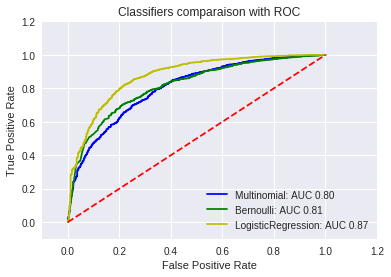

In [27]:
def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["senti"].map(vfunc), predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

*  Logistic NB performs better than the remaining all models.
*  Bernouli and Multinomial NB has similar performance.

## Precision, Recall, F1-score and support 

In [28]:
test.senti = test.senti.replace(["pos" , "neg"] , [True , False] )
keys = prediction.keys()
for key in ['Multinomial', 'Bernoulli', 'LogisticRegression']:
    print(" {}:".format(key))
    print(metrics.classification_report(test["senti"], prediction.get(key)>.5, target_names = ["positive", "negative"]))
    print("\n")

 Multinomial:
              precision    recall  f1-score   support

    positive       0.00      0.00      0.00       587
    negative       0.93      1.00      0.96      8070

   micro avg       0.93      0.93      0.93      8657
   macro avg       0.47      0.50      0.48      8657
weighted avg       0.87      0.93      0.90      8657



 Bernoulli:
              precision    recall  f1-score   support

    positive       0.37      0.19      0.25       587
    negative       0.94      0.98      0.96      8070

   micro avg       0.92      0.92      0.92      8657
   macro avg       0.65      0.58      0.60      8657
weighted avg       0.90      0.92      0.91      8657



 LogisticRegression:
              precision    recall  f1-score   support

    positive       0.52      0.36      0.43       587
    negative       0.95      0.98      0.97      8070

   micro avg       0.93      0.93      0.93      8657
   macro avg       0.74      0.67      0.70      8657
weighted avg       0.93

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# **Testing with hand written samples**

In [29]:
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))

test_sample(logreg, "this phone has awesome performance but it dont not have bluetooth")
test_sample(logreg, "bose is the best product i have seen and used in my life")
test_sample(logreg, "I dont like this product looks like fake")

Sample estimated as POS: negative prob 0.005167, positive prob 0.994833
Sample estimated as POS: negative prob 0.000757, positive prob 0.999243
Sample estimated as POS: negative prob 0.000275, positive prob 0.999725


# **Exploring more on dataset**

# **Forming word Cloud**

### All words from reviews

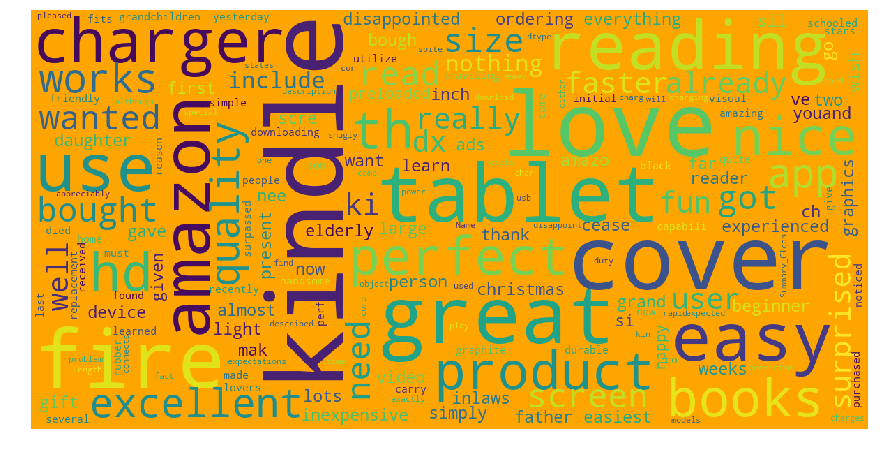

In [30]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='Orange',
        stopwords=stopwords,
        max_words=300,
        max_font_size=50, 
        scale=3,
        random_state=2 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(senti["Summary_Clean"])

### Positive words from reviews

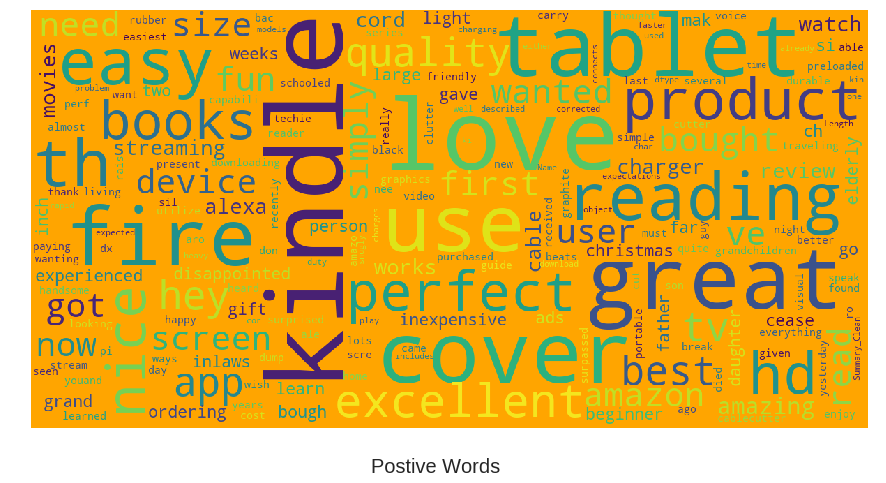

In [31]:
show_wordcloud(senti["Summary_Clean"][senti.senti == "pos"] , title="Postive Words")

### Negative words from reviews

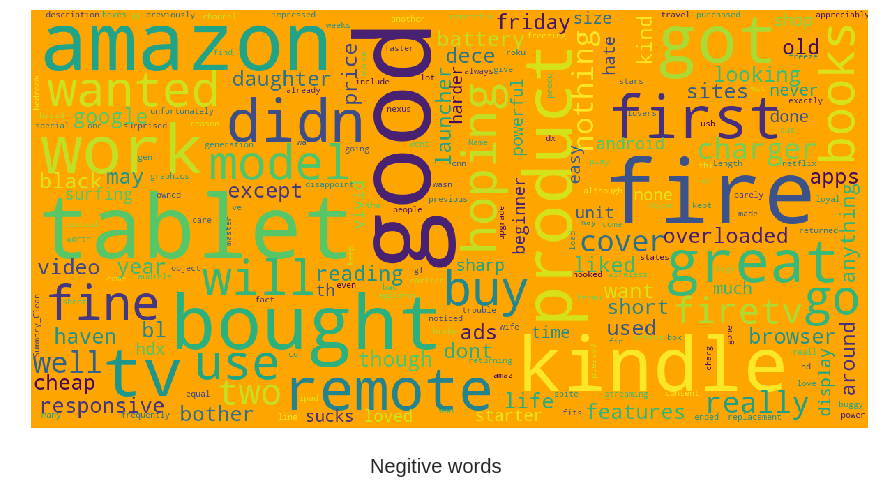

In [32]:
show_wordcloud(senti["Summary_Clean"][senti.senti == "neg"] , title="Negitive words")

# Exploring more on columns

In [33]:
df.head(1)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter


**Unique values**

In [34]:
df.nunique()

id                         42
name                       48
asins                      41
brand                       6
categories                 41
keys                       42
manufacturer                2
reviews.date             1078
reviews.dateAdded        1941
reviews.dateSeen         3911
reviews.didPurchase         1
reviews.doRecommend         2
reviews.id                  1
reviews.numHelpful         97
reviews.rating              5
reviews.sourceURLs      11929
reviews.text            34659
reviews.title           19767
reviews.userCity            0
reviews.userProvince        0
reviews.username        26789
dtype: int64

1.  Id is not used
2.  **Name is used **: 48 different product are available
3.  Asins: Not used
4.  Brand: Not used
5.  **Categories**: 41 different product categories are available
6.  Keys: Not useful (similar to categories)
7.  Manufacturer: Mostly Amazon so no Problem

**Reviews**
8.  date: used(convert to dateformat)
9.  **dateadded:** useful when to check when reviews are given(convert to dateformat)
10.  dateseen: Not useful
11.  didPurchase: Not useful
12.  doRecommend: Not useful
13.  Id: Not useful
14.  numHelpful: Not useful
15. ** rating: higly useful**
16.  sourceURLS: Not useful
17.  **Text: useful** (but preprocess for modelling)
18.  **Title: veryuseful **
19.  userCity: Not used as there are no values
20.  userProvince: Not used as there are no values
21.  username : Not used